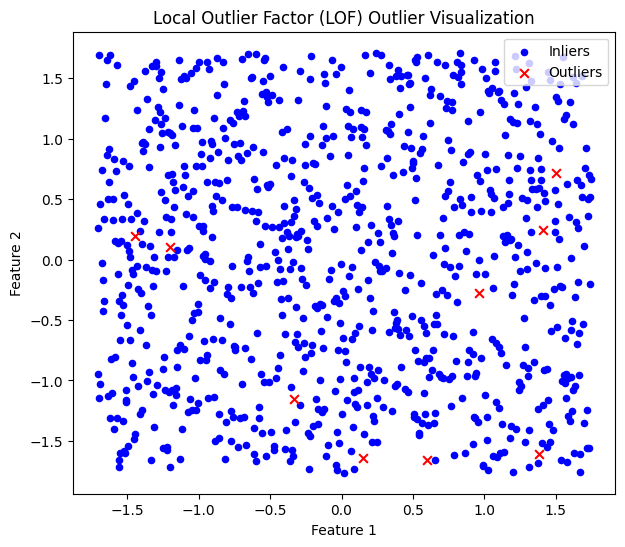

[Outlier Detection] Removed 9 outliers.
Running KNN with hyperparameter tuning AND No Feature Selection...
[Classification] Best Params: {'n_neighbors': 12, 'weights': 'distance'}


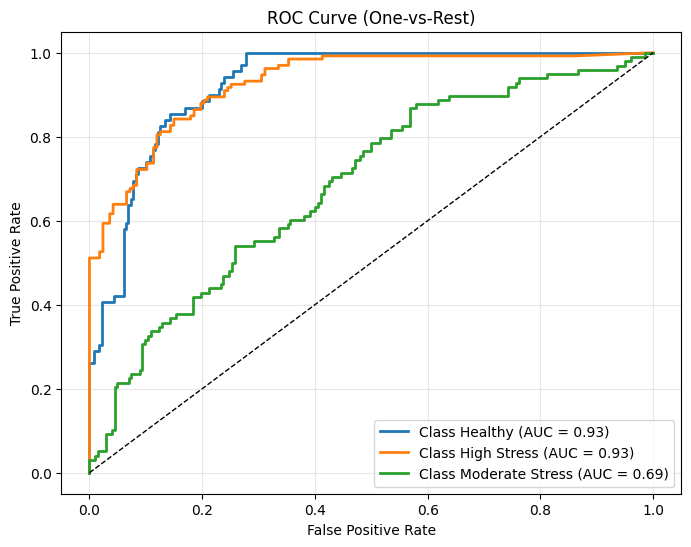

[Classification Report]
                 precision    recall  f1-score   support

        Healthy       0.64      0.61      0.62        69
    High Stress       0.81      0.74      0.77       133
Moderate Stress       0.51      0.59      0.55        98

       accuracy                           0.66       300
      macro avg       0.65      0.65      0.65       300
   weighted avg       0.67      0.66      0.66       300



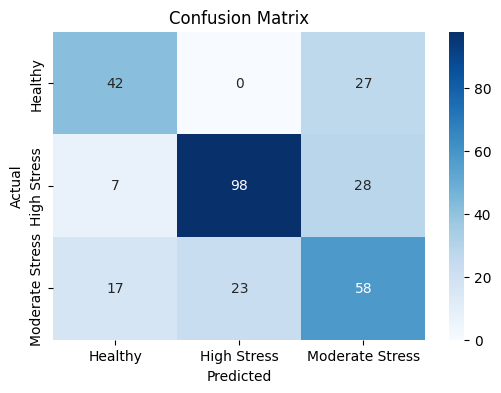

Fold scores: 0.6913376435879731
Mean: 0.6913376435879731 Std: 0.0
[Cross-validation Accuracy]: 0.6913


In [ ]:
import os
import random
import numpy as np

from sklearn.preprocessing import StandardScaler

from aki.core.preprocessing import load_and_preprocess_data
from aki.core.outlier_detection import remove_outliers
from aki.core.classification import (
    classify_with_knn,
    classify_with_knn_without_hyperparameter,
)

from aki.utils import find_project_root

seed = 42
random.seed(seed)
np.random.seed(seed)

PROJECT_ROOT = find_project_root()
train_path = os.path.join(PROJECT_ROOT, "data", "train_data.csv")
test_path = os.path.join(PROJECT_ROOT, "data", "test_data.csv")

# Preprocessing
X_train_raw, X_test_raw, y_train, y_test, X_train_scaled, X_test_scaled, label_encoder, scaler = (
    load_and_preprocess_data(train_path, test_path)
)

# Remove outliers
X_train_clean, y_train_clean = remove_outliers(
    X_train_scaled,  # scaled training features
    y_train
)

# No feature selection
X_train_selected = X_train_clean
X_test_selected = X_test_scaled  # already scaled

# Scale
selected_scaler = StandardScaler()
X_train_selected_scaled = selected_scaler.fit_transform(X_train_selected)
X_test_selected_scaled = selected_scaler.transform(X_test_selected)

print("Running KNN with hyperparameter tuning AND No Feature Selection...")
knn = classify_with_knn(
    X_train_selected_scaled,
    y_train_clean,
    label_encoder,
    X_test=X_test_selected_scaled,
    y_test=y_test
)

# print("Running KNN with NO hyperparameter tuning AND No Feature Selection...")
# knn = classify_with_knn_without_hyperparameter(
#     X_train_selected_scaled,
#     y_train_clean,
#     label_encoder,
#     X_test=X_test_selected_scaled,
#     y_test=y_test
# )
